In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import os
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
from google.colab import files

Mounted at /content/gdrive


In [ ]:
!rm -rf /content/custom_dataset 
#delete custom file

#preprocessing

In [ ]:
directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# create initial directory
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

def dataset_split(query, train_cnt, n_data):
    # make train and test data set directories
    shortPath = query.split('/')[-1]
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + shortPath):
            os.makedirs(directory + '/' + shortPath)
    # prepare the train and test data set.
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.copy2(query + '/' + file_name, './custom_dataset/train/'+shortPath +'/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.copy2(query + '/' + file_name, './custom_dataset/test/'+ shortPath +'/' + file_name)
        cnt += 1
        if cnt >= n_data :
            break

In [ ]:
query = '/content/gdrive/MyDrive/JLMclassifier/Junha_Face'
dataset_split(query, 40, 50)

[Train Dataset] Screenshot 2022-04-26 at 3.20.55 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.20.58 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.21.06 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.21.39 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.21.44 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.21.48 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.22.03 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.22.08 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.22.12 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.22.17 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.22.22 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.22.30 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.22.35 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.22.38 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.22.42 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.22.47 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.22.51 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.22.56

In [ ]:
query = '/content/gdrive/MyDrive/JLMclassifier/Max_Face'
dataset_split(query, 40, 50)

[Train Dataset] Screenshot 2022-04-26 at 3.12.30 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.12.35 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.12.39 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.12.45 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.12.50 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.12.54 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.13.03 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.13.13 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.13.18 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.13.22 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.13.32 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.13.37 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.13.48 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.13.53 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.13.58 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.14.02 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.14.10 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.14.15

In [ ]:
query = '/content/gdrive/MyDrive/JLMclassifier/Lukas_Face'
dataset_split(query, 40, 50)

[Train Dataset] Screenshot 2022-04-26 at 3.26.51 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.26.56 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.27.00 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.27.04 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.27.10 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.27.14 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.27.20 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.27.24 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.27.28 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.27.33 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.27.37 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.27.44 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.27.48 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.27.53 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.27.57 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.28.02 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.28.06 PM.png
[Train Dataset] Screenshot 2022-04-26 at 3.28.10

# Train Model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import time

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

In [ ]:
# transformation object
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)), # resize the image to 224x224 pixels
    transforms.RandomHorizontalFlip(), # data augmentation
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # regularization to a value btw 0 and 1
])
# transform for test
transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('training dataset size:', len(train_datasets))
print('test dataset size:', len(test_datasets))

class_names = train_datasets.classes
print('class:', class_names)

training dataset size: 120
test dataset size: 30
class: ['Junha_Face', 'Lukas_Face', 'Max_Face']


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


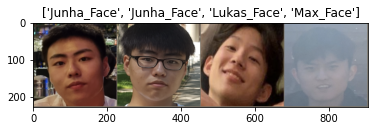

In [ ]:
def imshow(input, title):
    # torch.Tensor to numpy
    input = input.numpy().transpose((1, 2, 0))
    # recover image from regularisation.(if this isn't done, the image is not shown)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # print image
    plt.imshow(input)
    plt.title(title)
    plt.show()


# iterator for each batch
iterator = iter(train_dataloader)

# display image
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
model = models.resnet34(pretrained=True)
# resnet34 : transfer learning. Model that is already trained with many images
num_features = model.fc.in_features
# just add a layer to the back of the model to classify Max, Lukas, JunTi
model.fc = nn.Linear(num_features, 3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
# loss function for multi-class classification = sparse categoricla crossentropy
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
num_epochs = 500
model.train()
start_time = time.time()
best_loss = 100
best_epoch = 0
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # load training data in batches
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # calculate 
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # backpropagation
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    #early stopping
    if epoch > 10 :
      if epoch_loss < best_loss :
        es = 0
        best_loss = epoch_loss
        best_epoch = epoch
        torch.save(model, "model_bestmodel")
      else : 
        es += 1
        if es > 3 :
          print("Early stopping")
          break

    # print learning process
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


#0 Loss: 1.2140 Acc: 37.5000% Time: 4.2890s
#1 Loss: 0.6372 Acc: 70.0000% Time: 8.2122s
#2 Loss: 0.7486 Acc: 72.5000% Time: 12.2291s
#3 Loss: 0.4938 Acc: 80.0000% Time: 16.2305s
#4 Loss: 0.4982 Acc: 84.1667% Time: 20.3411s
#5 Loss: 0.8903 Acc: 75.0000% Time: 24.4007s
#6 Loss: 0.4110 Acc: 81.6667% Time: 28.4836s
#7 Loss: 0.3954 Acc: 85.8333% Time: 32.4950s
#8 Loss: 0.4923 Acc: 84.1667% Time: 36.6033s
#9 Loss: 0.2553 Acc: 91.6667% Time: 40.5229s
#10 Loss: 0.2399 Acc: 94.1667% Time: 44.4419s
#11 Loss: 0.3045 Acc: 90.8333% Time: 48.5783s
#12 Loss: 0.2565 Acc: 87.5000% Time: 52.7941s
#13 Loss: 0.6366 Acc: 81.6667% Time: 56.7714s
#14 Loss: 0.3239 Acc: 86.6667% Time: 60.7241s
#15 Loss: 0.3872 Acc: 88.3333% Time: 64.7134s
#16 Loss: 0.0676 Acc: 98.3333% Time: 68.9358s
#17 Loss: 0.2550 Acc: 93.3333% Time: 72.8164s
#18 Loss: 0.3802 Acc: 90.8333% Time: 76.8330s
#19 Loss: 0.0947 Acc: 96.6667% Time: 80.7558s
Early stopping


In [ ]:
model = torch.load("model_bestmodel")

#Test Model

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[예측 결과: Max_Face] (실제 정답: Max_Face)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_te

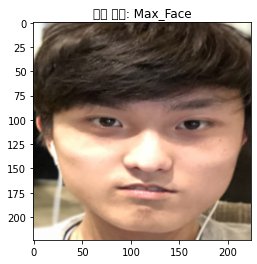

[예측 결과: Max_Face] (실제 정답: Lukas_Face)


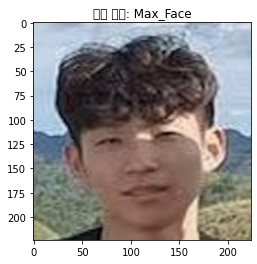

[예측 결과: Max_Face] (실제 정답: Max_Face)


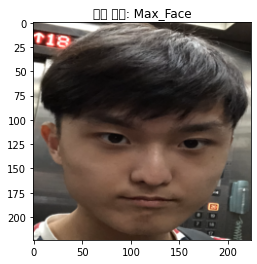

[예측 결과: Max_Face] (실제 정답: Max_Face)


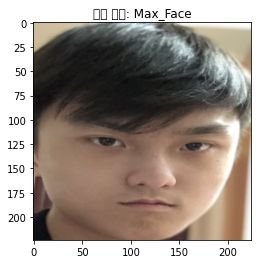

[예측 결과: Junha_Face] (실제 정답: Junha_Face)


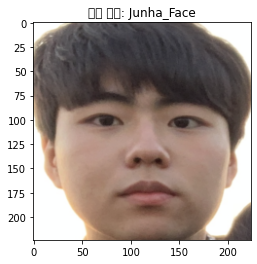

[예측 결과: Junha_Face] (실제 정답: Junha_Face)


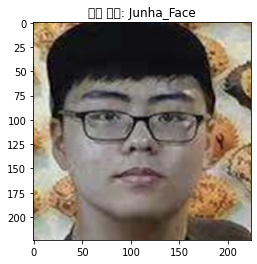

[예측 결과: Junha_Face] (실제 정답: Junha_Face)


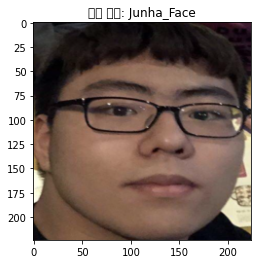

[예측 결과: Junha_Face] (실제 정답: Junha_Face)


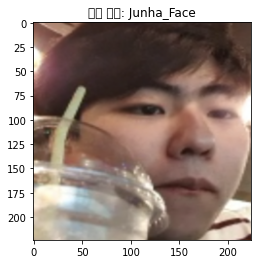

[Test Phase] Loss: 0.1521 Acc: 93.3333% Time: 2.9573s


In [ ]:
model.eval()
# pytorch method for evaluate() is eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # print test samples
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

In [ ]:
!pip install torchsummary

#Model Structure

In [ ]:
from torchsummary import summary
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

#Application

This extension allows an user to figure out whether the person on the photo is among Max, Lukas, and Junha.

1. The user uploads a photo of a person

2. We use a haarcascade alogrithm to detect the face of the person.

3. We crop the face and input the image into our pretrained model.

4. For cases where the face isn't detected or for higher accuracy, both the original image and the face is evaluated through the model.

5. The model ouputs which of the three the person is, or whom he or she resembles to.

In [ ]:
from torch.autograd import Variable
from PIL import Image
import cv2
import sys

In [ ]:
# 이미지 파일
from google.colab import files
uploaded = files.upload()

Saving IMG_20220427_011427_925.jpg to IMG_20220427_011427_925.jpg


In [ ]:
for fn in uploaded.keys():
  path = fn

#image = Image.open(uploaded)

In [ ]:
# delete face of the previous person
!rm -rf /content/face.PNG

In [ ]:
faceExist = False
# 캐스케이드 파일의 경로 지정
cascade_file = "/content/haarcascade_frontalface_alt.xml"
# 이미지 읽고
image = cv2.imread(path)
# 그레이스케일로 변환
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 얼굴 인식 특징 파일 읽고
cascade = cv2.CascadeClassifier(cascade_file)
# 얼굴 인식 부분
face_list = cascade.detectMultiScale(image_gs,
    scaleFactor=1.1,
    minNeighbors=1,
    minSize=(150,150))
if len(face_list) > 0:
    # 인식한 부분 표시
    for face in face_list:
        x,y,w,h = face
    cropped = image[y - int(h/4):y + h + int(h/4), x - int(w/4):x + w + int(w/4)]
    faceExist = True
    # 파일저장
    cv2.imwrite("face.PNG", cropped)
else:
    print("no face")

In [ ]:
transforms_new = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
image = Image.open(path)
if faceExist:
  image_face = Image.open("/content/face.PNG")
  img_face = transforms_new(image_face)
  img_face_batch = img_face.unsqueeze(0)
  img_face = img_face.to(device)
  img_face_batch = img_face_batch.to(device)

img = transforms_new(image)
img_batch = img.unsqueeze(0)
img = img.to(device)
img_batch = img_batch.to(device)

In [ ]:
model.eval()
with torch.no_grad():     # does not calculate gradient
  if not faceExist : 
    class_index = model(img_batch).argmax()
  else :
    face_percentage = model(img_face_batch).max()
    photo_percentage = model(img_batch).max()

    if face_percentage > photo_percentage : 
      class_index = model(img_face_batch).argmax()
      
    else : 
      class_index = model(img_batch).argmax()

  print(class_names[class_index])  #gets the prediction for the image's class


Max_Face
